### [Official Notebook](https://github.com/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb)
## Chapter01 : The ML Landscape

### Import and Global settings :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model

In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
sns.set_palette("magma_r")

### Loading and Reading Data :

In [3]:
oecd_bli = pd.read_csv("../00_Resources/01_Datasets/oecd_bli_2015.csv", thousands=',')
print("OECD-BLI-2015 Dataset ready for use!")
gdp_per_capita = pd.read_csv("../00_Resources/01_Datasets/gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1')
print("GDP-PER-CAPITA Dataset ready for use!")

OECD-BLI-2015 Dataset ready for use!
GDP-PER-CAPITA Dataset ready for use!


In [4]:
oecd_bli.head(3)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN


In [5]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


### Merging OECD's life satisfaction data and IMF's GDP per capita data :

In [6]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015":"GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[keep_indices]

In [7]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

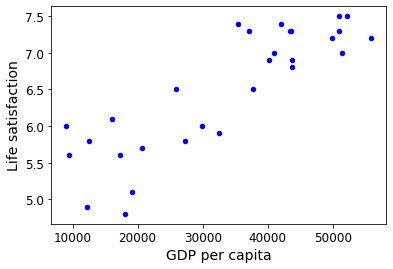

In [8]:
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", color='blue')
plt.show()

In [9]:
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
print("Model training done!")

Model training done!


### Making a prediction for Cyprus :

In [10]:
X_new = [[22587]]            # Cyprus' GDP per capita
print("Prediction using LinearRegression() :", model.predict(X_new))  # Predicting on new value

Prediction using LinearRegression() : [[5.96242338]]


### Using K-Nearest-Neighbors algorithm :

In [11]:
import sklearn.neighbors
model_knearest = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model_knearest.fit(X, y)

print("Prediction using KNeighborsRegressor() :", model_knearest.predict(X_new))

Prediction using KNeighborsRegressor() : [[5.76666667]]
